<a href="https://colab.research.google.com/github/Bonjiang/datasci_3_eda/blob/main/507_W3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [63]:
df = pd.read_csv ('gpa_study_hours.csv')
df

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0
...,...,...
188,3.60,24.0
189,3.70,12.0
190,3.84,15.0
191,3.80,10.0


### Univariate Analysis for GPA

In [ ]:
mean = np.mean(df['gpa'])
mean

In [ ]:
median = np.median(df['gpa'])
median

In [ ]:
mode = df['gpa'].mode().values[0]
mode

In [ ]:
range_value = df['gpa'].max() - df['gpa'].min()
range_value

In [ ]:
variance = np.var(df['gpa'])
variance

In [ ]:
std_deviation = np.std(df['gpa'])
std_deviation

In [ ]:
q75, q25 = np.percentile(df['gpa'], [75, 25])
iqr = q75 - q25
iqr

In [103]:
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_value}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")
print(f"IQR: {iqr}")

Mean: 17.476683937823836
Median: 15.0
Mode: 10.0
Range: 1.6999999999999997
Variance: 0.08107747510000268
Standard Deviation: 0.2847410667606671
IQR: 11.4


### Univariate Analysis for Study Hours

In [ ]:
mean = np.mean(df['study_hours'])
mean

In [ ]:
median = np.median(df['study_hours'])
median

In [ ]:
mode = df['study_hours'].mode().values[0]
mode

In [ ]:
range_value = df['gpa'].max() - df['gpa'].min()
range_value

In [ ]:
variance = np.var(df['gpa'])
variance

In [ ]:
std_deviation = np.std(df['gpa'])
std_deviation

In [ ]:
q75, q25 = np.percentile(df['gpa'], [75, 25])
iqr = q75 - q25
iqr

In [104]:
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_value}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")
print(f"IQR: {iqr}")

Mean: 17.476683937823836
Median: 15.0
Mode: 10.0
Range: 1.6999999999999997
Variance: 0.08107747510000268
Standard Deviation: 0.2847410667606671
IQR: 11.4


### Histogram

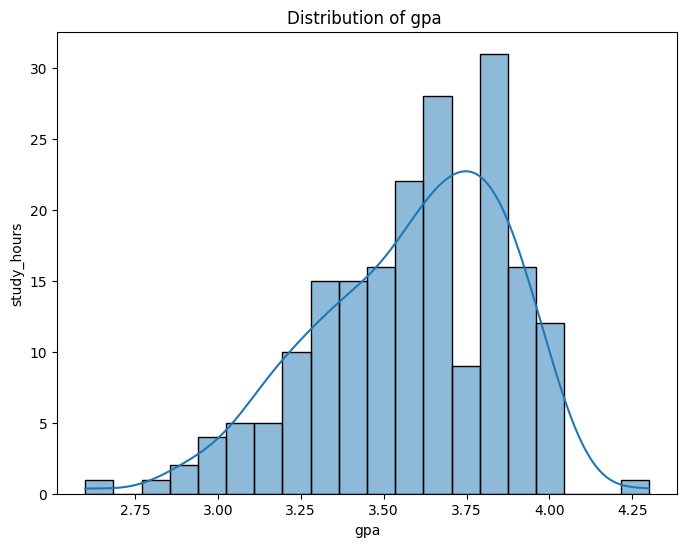

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='gpa', bins= 20, kde=True)
plt.title('Distribution of gpa ')
plt.xlabel('gpa')
plt.ylabel('study_hours')
plt.show()


### Scatterplot

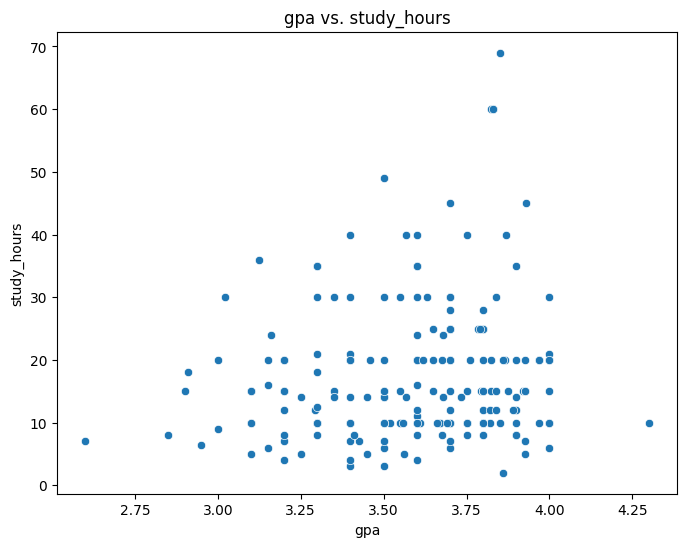

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='gpa', y='study_hours')
plt.title('gpa vs. study_hours')
plt.xlabel('gpa')
plt.ylabel('study_hours')
plt.show()

### Box Plot

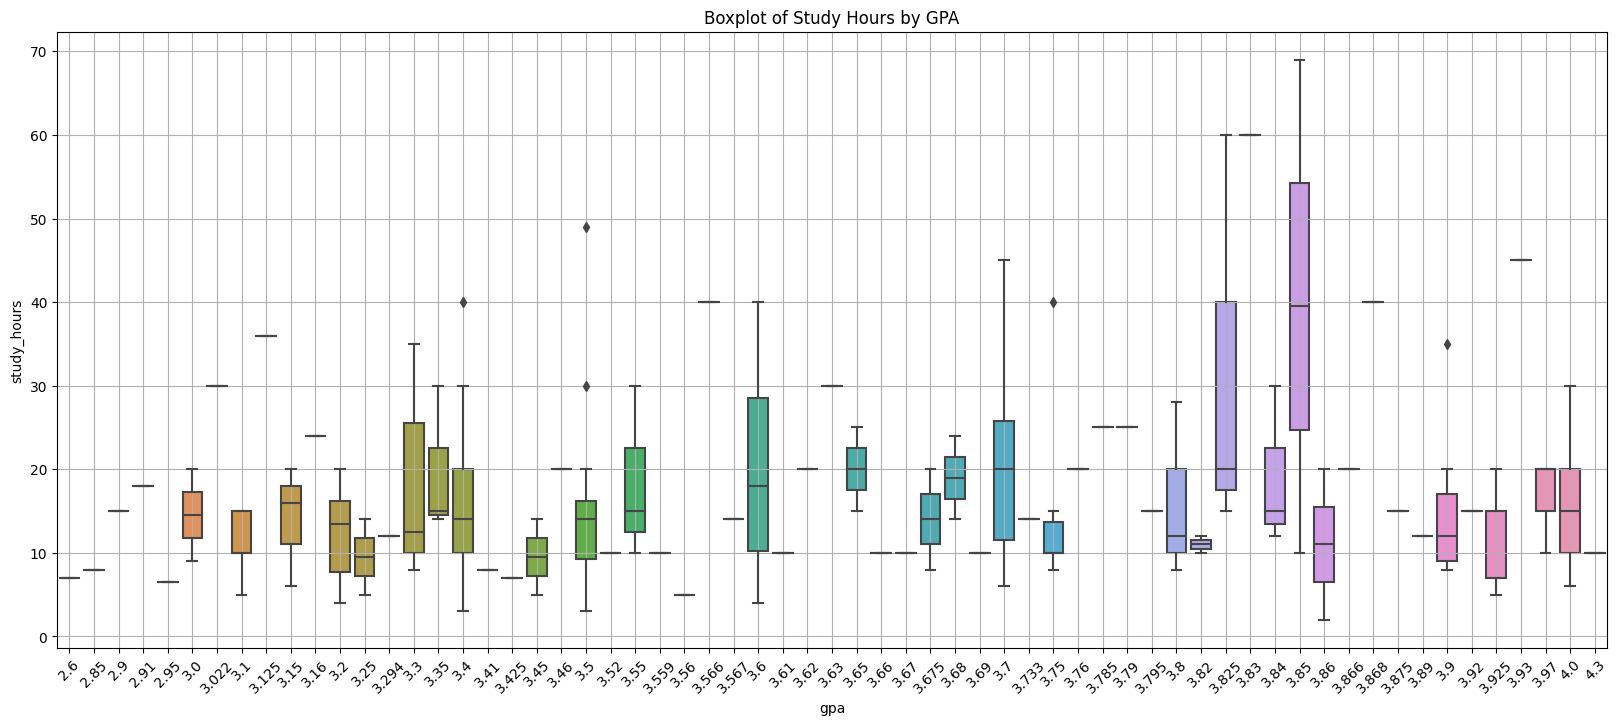

In [107]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='gpa', y='study_hours', data=df)
plt.title('Boxplot of Study Hours by GPA')
plt.xlabel('gpa')
plt.ylabel('study_hours')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

### Computing Correlation Coefficients for Numerical Variables

In [108]:
correlation_matrix = df[['gpa', 'study_hours']].corr()
correlation_matrix

,gpa,study_hours
gpa,1.000000,0.133014
study_hours,0.133014,1.000000


##### There is no strong correlation observed between gpa and study hours.

### Identifying Outliers

In [109]:
Q1 = df['study_hours'].quantile(0.25)
Q3 = df['study_hours'].quantile(0.75)
IQR = Q3 - Q1

threshold_lower = Q1 - 1.5 * IQR
threshold_upper = Q3 + 1.5 * IQR

outliers = df[(df['study_hours'] < threshold_lower) | (df['study_hours'] > threshold_upper)]

print("Outliers:")
print(outliers)

Outliers:
       gpa  study_hours
2    3.930         45.0
7    3.400         40.0
13   3.830         60.0
51   3.868         40.0
57   3.125         36.0
77   3.566         40.0
83   3.850         69.0
89   3.700         45.0
122  3.750         40.0
125  3.500         49.0
130  3.825         60.0
135  3.600         40.0
169  3.830         60.0


### Retaining Outliers

##### Outliers will be retained because studying for a certain amount of hours does not equate to a certain GPA and everyone is different. Students studying less or more and getting different GPAs are dependent among many factors. These outliers are also not due to data entry errors.

### Automated Analysis

In [102]:
data = pd.read_csv('gpa_study_hours.csv')

report = ProfileReport(data)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]